In [1]:
import numpy as np

In [3]:
X = np.loadtxt("data.txt", delimiter=",")
y = np.loadtxt("target.txt") - 1

In [4]:
X = X[:,:2]

In [5]:
X.shape

(90, 2)

In [6]:
y.shape

(90,)

In [7]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
num_examples, num_features = X.shape

In [9]:
num_classes = len(np.unique(y))

In [10]:
num_classes

3

In [11]:
eps = 1e-6

In [12]:
classes_mean = {}
classes_variance = {}
classes_prior = {}

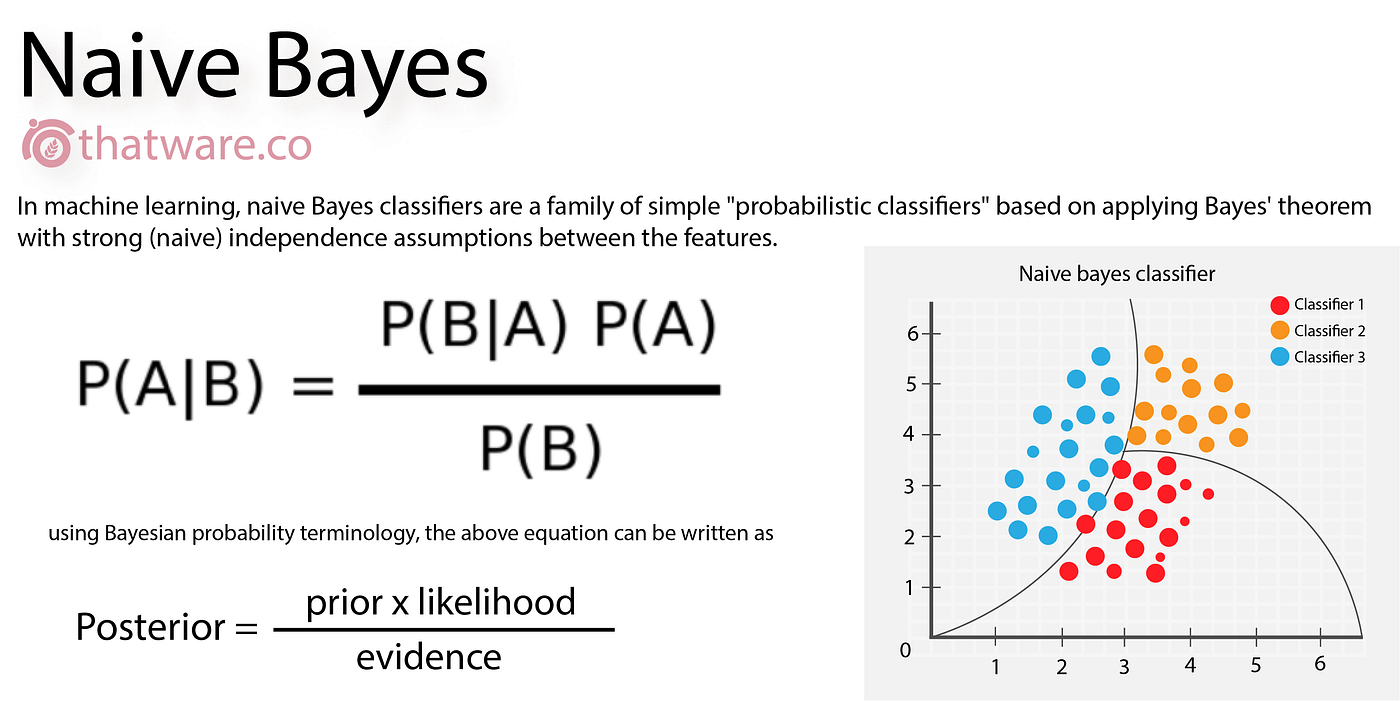

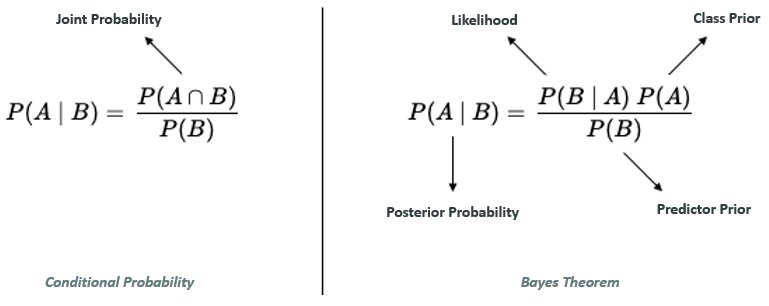

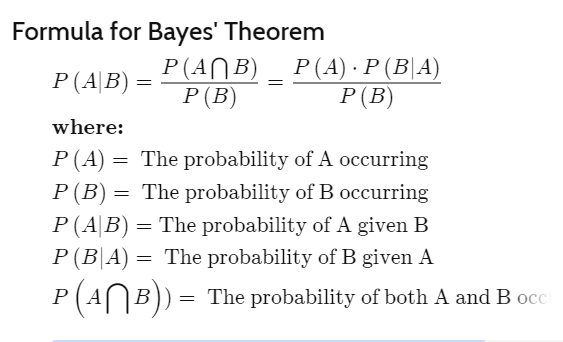

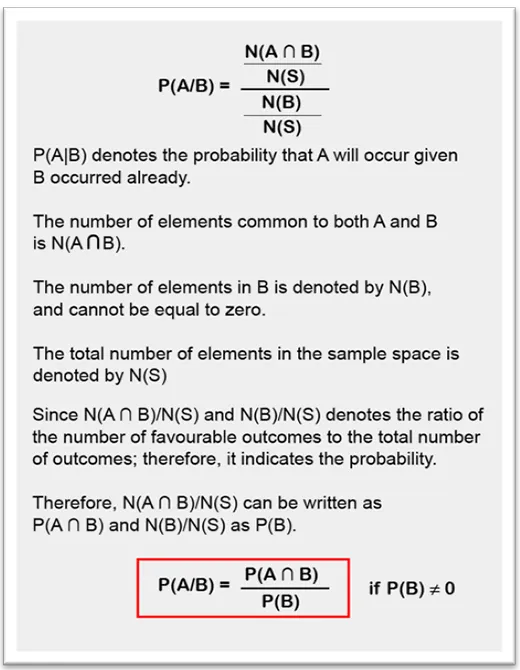

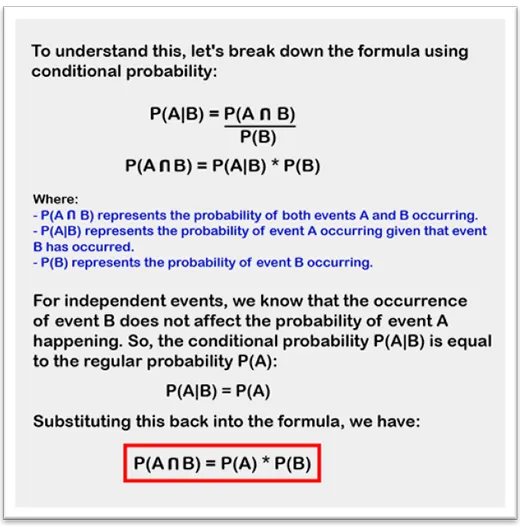

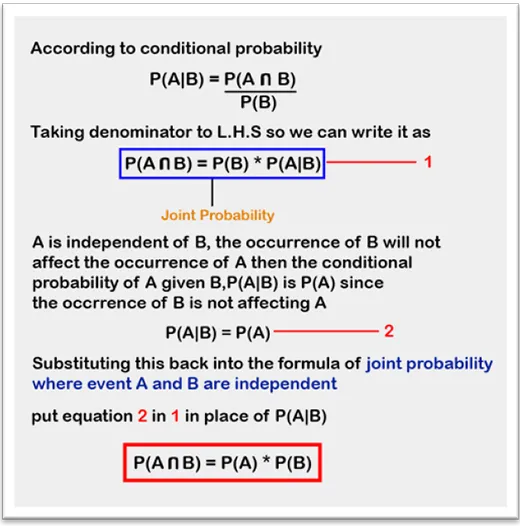

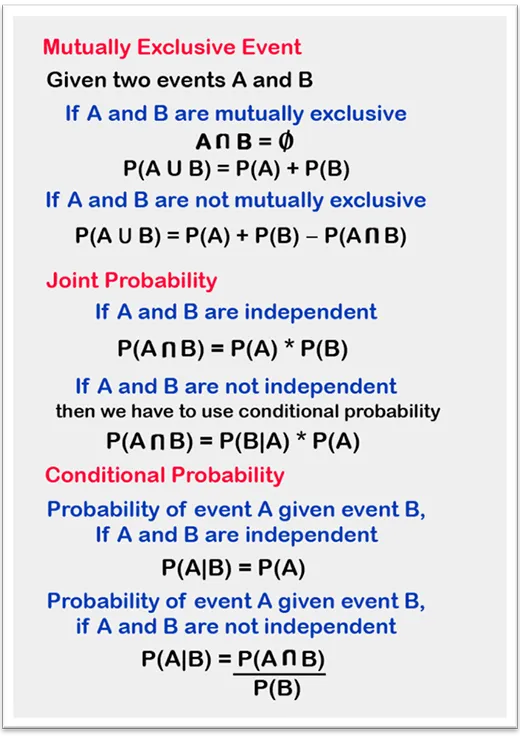

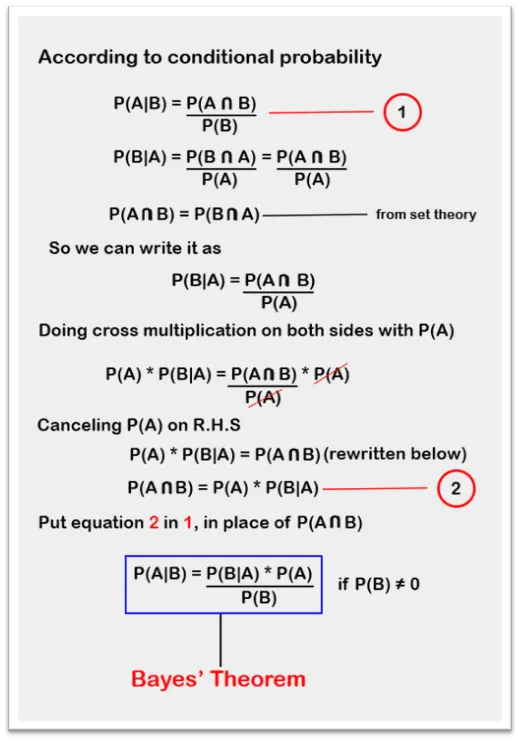

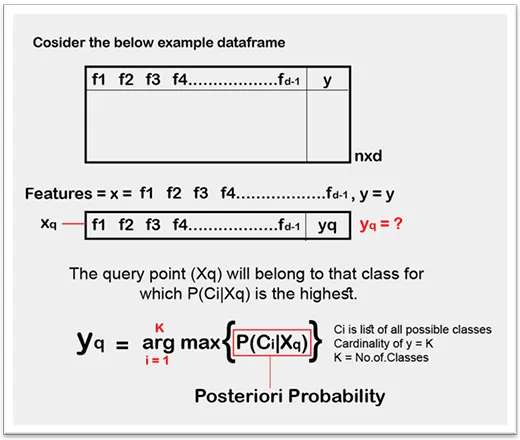

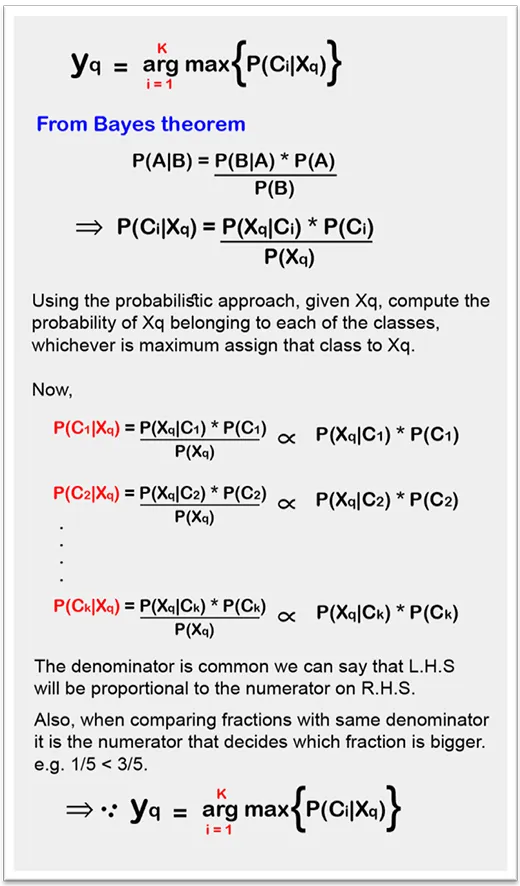

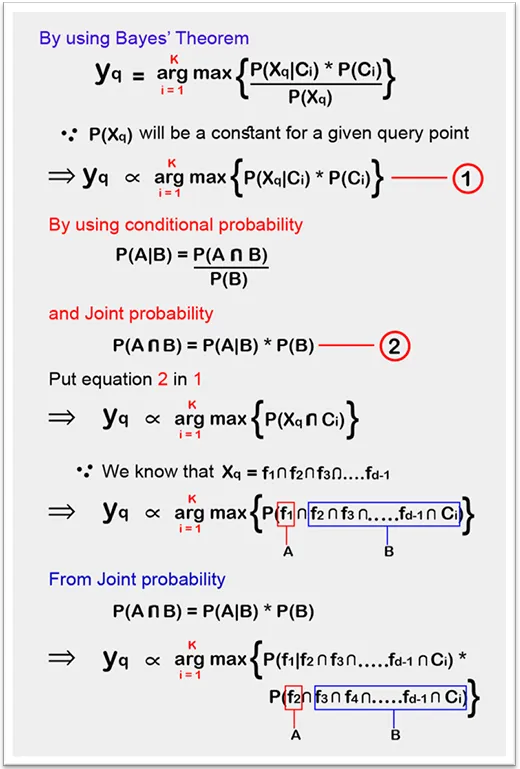

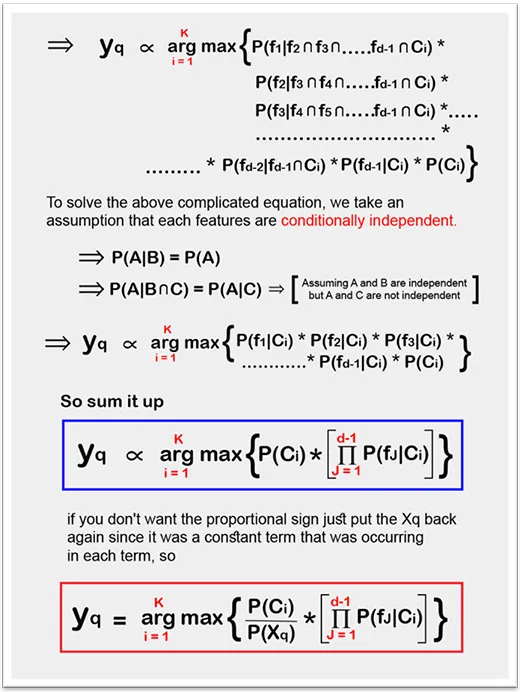

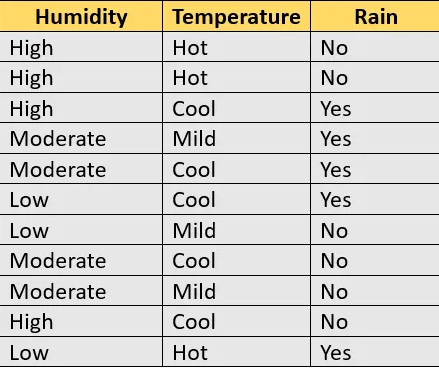

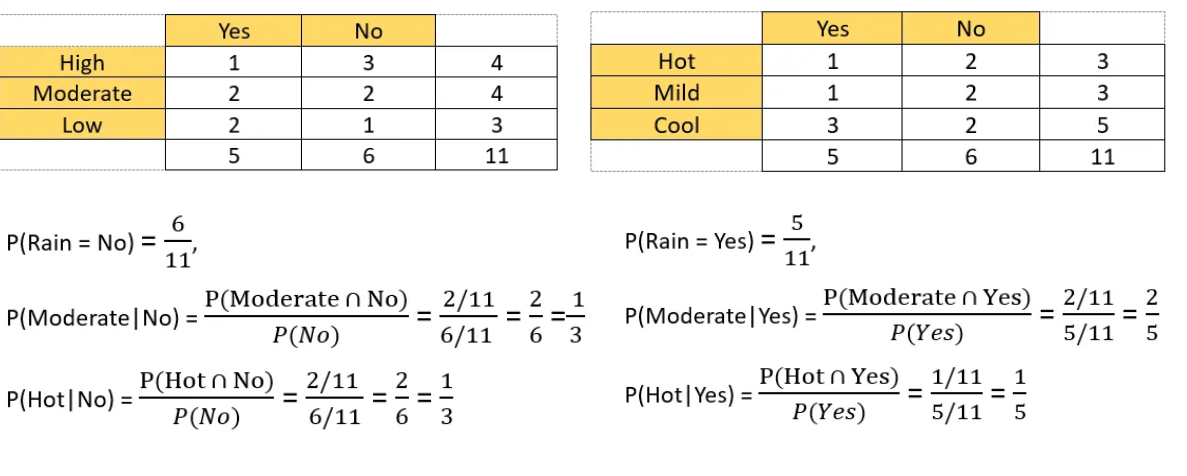


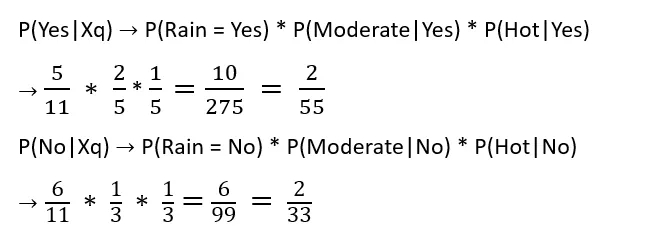

In [13]:
X[y == 0] # data sample belongs to class 0
# X[y == 1] # data sample belongs to class 1

array([[ 1.1107, -2.1079],
       [-0.5498,  0.0943],
       [-0.0382,  1.8829],
       [ 0.0555, -0.6139],
       [ 0.587 , -1.2067],
       [ 0.5453,  0.2509],
       [-0.3927, -0.622 ],
       [-1.1905, -1.8785],
       [-0.424 ,  0.7772],
       [-0.7139,  1.5846],
       [-0.8883,  2.1408],
       [-0.6922,  0.0993],
       [ 1.435 ,  1.2334],
       [-0.7576,  0.7386],
       [-1.1144, -1.7059],
       [ 0.6612, -1.7296],
       [-2.1381, -0.06  ],
       [ 1.3857,  1.2178],
       [-1.4951,  0.0373],
       [ 0.8029,  0.9739],
       [ 1.5607,  1.5862],
       [ 0.8563, -1.4245],
       [ 0.0397, -1.3799],
       [ 1.2331,  1.7421],
       [-2.0015,  0.8355],
       [-0.3428, -0.478 ],
       [-0.8891,  1.2634],
       [ 0.3832, -0.1189],
       [ 0.4172,  1.0132],
       [-0.8695, -0.7947]])

In [14]:
for c in range(num_classes):
    X_c = X[y == c]
    classes_mean[str(c)] = np.mean(X_c, axis=0)
    classes_variance[str(c)] = np.var(X_c, axis=0)
    classes_prior[str(c)] = X_c.shape[0] / X.shape[0]

In [ ]:
# for c in range(num_classes):: Loops through each class label (c) from 0 to num_classes-1.
# X_c = X[y == c]: Selects the rows of the feature matrix X where the corresponding class label in y is equal to c. This gives the subset of features for class c.
# classes_mean[str(c)] = np.mean(X_c, axis=0): Calculates the mean of the features for class c and stores it in the classes_mean dictionary with the key as the class label (str(c)).
# classes_variance[str(c)] = np.var(X_c, axis=0): Calculates the variance of the features for class c and stores it in the classes_variance dictionary.
# classes_prior[str(c)] = X_c.shape[0] / X.shape[0]: Calculates the prior probability of class c (i.e., the proportion of samples in class c out of all samples) and stores it in the classes_prior dictionary.

In [15]:
classes_mean

{'0': array([-0.11414   ,  0.11169667]),
 '1': array([1.81612667, 2.54447   ]),
 '2': array([ 1.6356    , -2.13877667])}

In [16]:
classes_variance

{'0': array([0.98955529, 1.50756055]),
 '1': array([1.7073339 , 1.06592179]),
 '2': array([1.11579721, 1.19174972])}

In [17]:
classes_prior

{'0': 0.3333333333333333, '1': 0.3333333333333333, '2': 0.3333333333333333}

In [ ]:

# Variance is a measure of the spread or dispersion of a set of data from its mean value. It represents how much the individual data points deviate from the average value.
# Formula:
# The variance (σ²) is calculated using the following formula:
# σ² = Σ(xi - μ)² / N
# Where:
# xi is each individual data point
# μ is the mean of the data
# N is the number of data points
# Σ denotes the sum of the squared differences
# Interpretation:
# A high variance indicates that the data points are spread out over a larger range, while a low variance indicates that the data points are closer to the mean.
# Example:
# Suppose we have the following dataset:
# [2, 4, 6, 8, 10]
# The mean of this dataset is 6. The variance would be calculated as:
# σ² = [(2-6)² + (4-6)² + (6-6)² + (8-6)² + (10-6)²] / 5
# = [16 + 4 + 0 + 4 + 16] / 5
# = 40 / 5
# = 8

In [22]:
def fit( X):
    classes_mean = {}
    classes_variance = {}
    classes_prior = {}

    for c in range(num_classes):
        X_c = X[y == c]

        classes_mean[str(c)] = np.mean(X_c, axis=0)
        classes_variance[str(c)] = np.var(X_c, axis=0)
        classes_prior[str(c)] = X_c.shape[0] / X.shape[0]

In [34]:
probs_in = np.zeros((num_examples, num_classes))

In [35]:
probs_in[:10]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [23]:
prior = classes_prior['0']

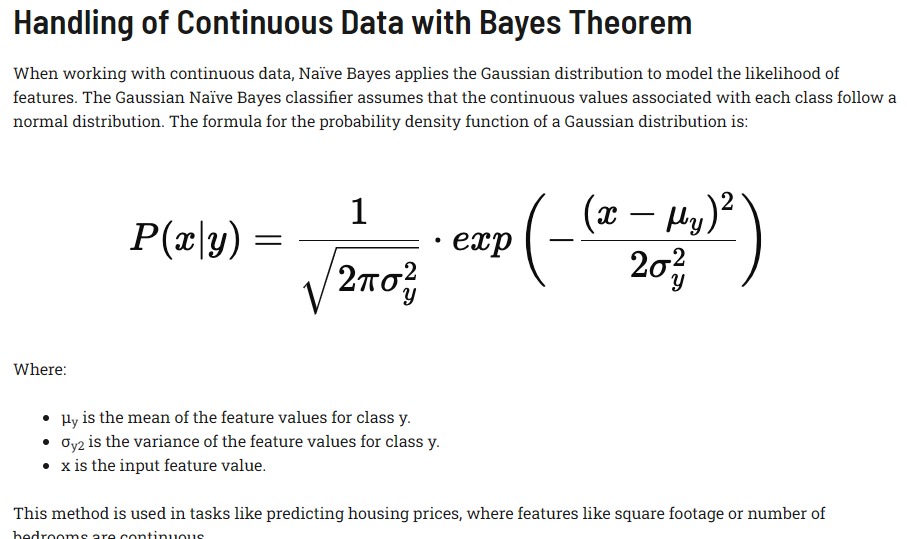

In [26]:
const = -num_features / 2 * np.log(2 * np.pi) - 0.5 * np.sum( np.log(classes_variance['0'] + eps))

In [25]:
# -num_features / 2 * np.log(2 * np.pi): Calculates the first part of the constant term, which involves the number of features (num_features) and the logarithm of 2π.
# - 0.5 * np.sum(np.log(classes_variance['0'] + eps)): Calculates the second part of the constant term, which involves the logarithm of the variance of the features (classes_variance['0']) and a small value eps added for numerical stability.

In [ ]:
# The constant term is used to normalize the Gaussian probability density function (PDF) in the Gaussian Naive Bayes classifier.
# Gaussian Naive Bayes:
# The Gaussian Naive Bayes classifier assumes that the features follow a Gaussian distribution. The classifier calculates the probability of each class given the features using the Gaussian PDF.
# Formula:
# The Gaussian PDF is given by:
# P(x|μ, σ²) = (1 / √(2πσ²)) * exp(-((x-μ)² / 2σ²))
# Where:
# x is the feature vector
# μ is the mean vector
# σ² is the variance vector
# Simplification:
# The constant term is used to simplify the Gaussian PDF formula by separating the constant terms from the exponential term.
# Example:
# Suppose we have a Gaussian Naive Bayes classifier with 2 features (num_features=2) and a variance vector classes_variance['0'] = [1, 2]. The constant term would be calculated as:
# const = -2 / 2 * np.log(2 * np.pi) - 0.5 * np.sum(np.log([1, 2] + eps))

In [27]:
const

np.float64(-2.037874489784524)

In [28]:
probs = 0.5 * np.sum(np.power(X - classes_mean['0'], 2) / (np.log(classes_variance['0']) + eps), 1)

In [29]:
# np.power(X - classes_mean['0'], 2): Calculates the squared difference between each feature in X and the corresponding mean of class 0.
# np.sum(..., 1): Sums the squared differences along the rows (axis=1) of the resulting array.
# / (np.log(classes_variance['0']) + eps): Divides the sum of squared differences by the natural logarithm of the variance of class 0 plus a small value eps for numerical stability.
# 0.5 * ...: Multiplies the result by 0.5.

In [31]:
const - probs

array([63.41019854,  7.00100346, -5.58442951, -1.30861844, 19.25737851])

In [36]:
probs_in[:, c] = (const - probs)+ np.log(prior)

In [38]:
probs_in[:5]

array([[ 0.        ,  0.        , 62.31158625],
       [ 0.        ,  0.        ,  5.90239118],
       [ 0.        ,  0.        , -6.6830418 ],
       [ 0.        ,  0.        , -2.40723073],
       [ 0.        ,  0.        , 18.15876623]])

In [39]:
np.argmax(probs_in,1)

array([2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2])

In [40]:
print(f"Accuracy: {sum(np.argmax(probs_in,1)==y)/X.shape[0]}")

Accuracy: 0.34444444444444444


In [41]:
class NaiveBayes:
    def __init__(self, X, y):
        self.num_examples, self.num_features = X.shape
        self.num_classes = len(np.unique(y))
        self.eps = 1e-6

    def fit(self, X):
        self.classes_mean = {}
        self.classes_variance = {}
        self.classes_prior = {}

        for c in range(self.num_classes):
            X_c = X[y == c]

            self.classes_mean[str(c)] = np.mean(X_c, axis=0)
            self.classes_variance[str(c)] = np.var(X_c, axis=0)
            self.classes_prior[str(c)] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        probs = np.zeros((self.num_examples, self.num_classes))

        for c in range(self.num_classes):
            prior = self.classes_prior[str(c)]
            probs_c = self.density_function(
                X, self.classes_mean[str(c)], self.classes_variance[str(c)]
            )
            probs[:, c] = probs_c + np.log(prior)

        return np.argmax(probs, 1)

    def density_function(self, x, mean, sigma):
        # Calculate probability from Gaussian density function
        const = -self.num_features / 2 * np.log(2 * np.pi) - 0.5 * np.sum(
            np.log(sigma + self.eps)
        )
        probs = 0.5 * np.sum(np.power(x - mean, 2) / (sigma + self.eps), 1)
        return const - probs

In [42]:
NB = NaiveBayes(X, y)
NB.fit(X)
y_pred = NB.predict(X)
print(f"Accuracy: {sum(y_pred==y)/X.shape[0]}")

Accuracy: 0.9
